In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import gzip
import common

common.pltsetup()

In [2]:
def plot_distrib(name, xlabel, ylabel):
    with gzip.open(f'data/compression/{name}.txt.gz', 'r') as f:
        contents = f.read()
    lines = [line.split() for line in contents.splitlines() if line]
    x = [int(v) for v, _ in lines]
    y = [int(v) for _, v in lines]
    y_cum = np.cumsum(y[::-1])[::-1]
    
    plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(x, y, '.', markersize=3, label="Frequency ($= x$)", rasterized=True)
    plt.plot(x, y_cum, '.', markersize=3, label="Cumulative freq. ($\\geq x$)", rasterized=True)
    plt.legend(markerscale=4)
    plt.grid()
    plt.savefig(f'../img/compression/distributions/{name}.pdf', dpi=200)

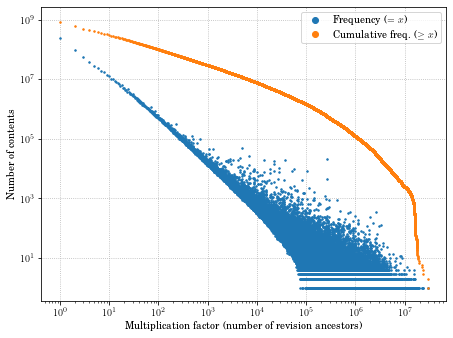

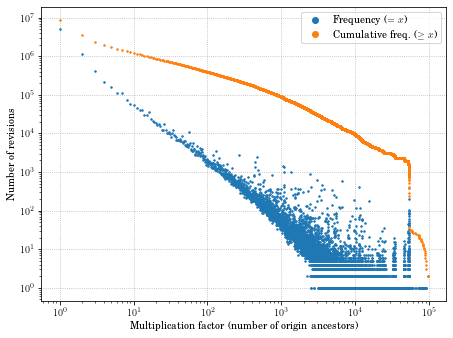

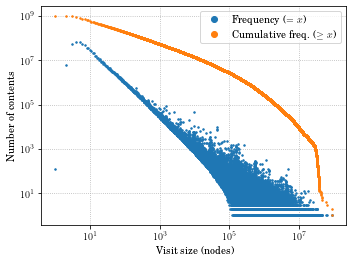

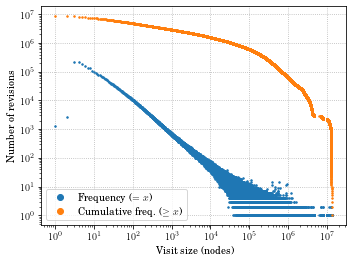

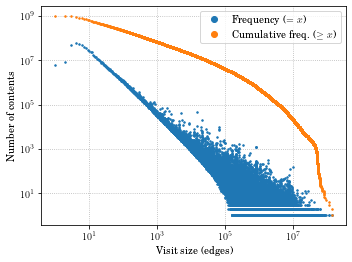

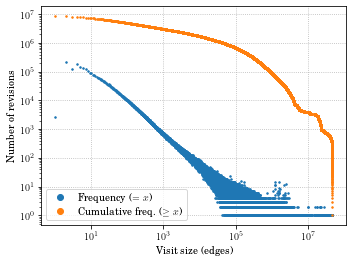

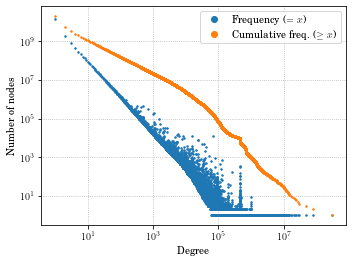

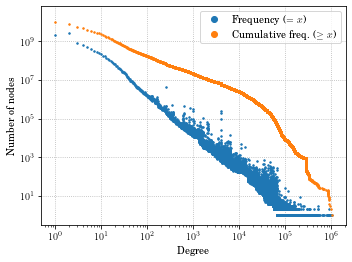

In [4]:
plt.rcParams.update({"figure.figsize": [6.4, 4.8]})

multfactlabel = 'Multiplication factor (number of {} ancestors)'
numlabel = 'Number of {}'
visitlabel = 'Visit size ({})'

plot_distrib('contents', multfactlabel.format('revision'), numlabel.format('contents'))
plot_distrib('revisions', multfactlabel.format('origin'), numlabel.format('revisions'))

plt.rcParams.update({"figure.figsize": [5, 3.75]})

plot_distrib('contents_node_size', visitlabel.format('nodes'), numlabel.format('contents'))
plot_distrib('revisions_node_size', visitlabel.format('nodes'), numlabel.format('revisions'))

plot_distrib('contents_arc_size', visitlabel.format('edges'), numlabel.format('contents'))
plot_distrib('revisions_arc_size', visitlabel.format('edges'), numlabel.format('revisions'))

plot_distrib('indegrees', "Degree", "Number of nodes")
plot_distrib('outdegrees', "Degree", "Number of nodes")